#  Credit Card Fraud Detection¶
Credit card fraud is a growing concern in the financial industry, leading to significant monetary losses and security risks. This project aims to develop a machine learning-based fraud detection system that can accurately identify fraudulent transactions in real time.

# Some insights  
1.The percentage of fraud is 0.5788651743883394 % and the percentage of non-fraud is 99.42113482561166 %  
2.['grocery_pos', 'shopping_net', 'misc_net','shopping_pos', 'gas_transport']) these instances of category columns covers 70 % of dataset and contribute around 50 % in fraud money  
3. Frauds mostly occur when the amount >200$.Thus we need to be careful at that time.  
4.This concludes major fraud case happens on weekends as well as on monday  
5. This shows that major frauds happens in the monthof April, Jun, Jan, Feb.  
6. This shows that major frauds happens at night.  


 
1️⃣ Load Data  
2️⃣ Preprocess & Clean Data  
3️⃣ Feature Engineering  
4️⃣ EDA  
5️⃣ Train-Test Split  
6️⃣ Train Models  
7️⃣ Evaluate & Tune Models  
8️⃣ Deploy & Monitor  

## Importing dependencies

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 1️⃣ Data Loading

In [10]:
df = pd.read_csv("C:/Users/surafel/Downloads/dataset/fraudTrain.csv", index_col=0)

In [11]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [12]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
row,col=df.shape
print(f'The dataset has {row} rows and {col} columns.')

The dataset has 1296675 rows and 22 columns.


In [14]:
print(df.describe())

             cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  1.284128e+07  5.109788e+00  1.377

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [16]:
fraud_percentage=len(df[df['is_fraud']==1])/len(df)*100
non_fraud_percentage=100-fraud_percentage
print(f'The percentage of fraud is {fraud_percentage} % and the percentage of non-fraud is {non_fraud_percentage} %')
print('This shows how imbalanced is the dataset')

The percentage of fraud is 0.5788651743883394 % and the percentage of non-fraud is 99.42113482561166 %
This shows how imbalanced is the dataset


## Checking for missing values

In [17]:
df.isna().sum()
# No missing values

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Studing different columns

In [18]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#  1. cc_num

In [19]:
df['cc_num'].value_counts()

cc_num
4512828414983801773    3123
571365235126           3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
4734310647841293          7
4714017207228610634       7
6011732631674654          7
501894933032              7
4975457191020             7
Name: count, Length: 983, dtype: int64

In [20]:
df[df['is_fraud']==1].cc_num.value_counts()

cc_num
4593569795412          19
3520550088202337       19
4260128500325          18
3518669219150142       16
30074693890476         16
                       ..
3576431665303017        2
4809701904914           2
4089096483689733451     2
6011109736646996        2
4005676619255478        2
Name: count, Length: 762, dtype: int64

cc_num does decide the fraud case thus we can remove cc_num

In [21]:
df.drop(columns=['cc_num'],inplace=True)

#  2. merchant

In [22]:
df.merchant.value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [23]:
df[df['is_fraud']==1].merchant.value_counts().head(50)

merchant
fraud_Rau and Sons                        49
fraud_Kozey-Boehm                         48
fraud_Cormier LLC                         48
fraud_Doyle Ltd                           47
fraud_Kilback LLC                         47
fraud_Vandervort-Funk                     47
fraud_Padberg-Welch                       44
fraud_Kuhn LLC                            44
fraud_Terry-Huel                          43
fraud_Jast Ltd                            42
fraud_Goyette Inc                         42
fraud_Koepp-Witting                       42
fraud_Schmeler, Bashirian and Price       41
fraud_Kerluke-Abshire                     41
fraud_Kiehn-Emmerich                      41
fraud_McDermott-Weimann                   41
fraud_Hudson-Ratke                        40
fraud_Moen, Reinger and Murphy            40
fraud_Boyer PLC                           40
fraud_Murray-Smitham                      40
fraud_Gleason-Macejkovic                  40
fraud_Bailey-Morar                        39
f

As fraudster can use different names , it is not imp as a feature

In [24]:
df.drop(columns=['merchant'],inplace=True)

#  2. Category

In [25]:
df.category.value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [26]:
df[df['is_fraud']==1].category.value_counts()

category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: count, dtype: int64

In [27]:
(1743+1713+915+843+618)/(df[df['is_fraud']==1].category.value_counts().sum())*100

np.float64(77.6978417266187)

In [28]:
df.groupby('category')['amt'].sum().sort_values(ascending=False)

category
grocery_pos       14460822.38
shopping_pos       9307993.61
shopping_net       8625149.68
gas_transport      8351732.29
home               7173928.11
kids_pets          6503680.16
entertainment      6036678.56
misc_net           5117709.26
misc_pos           5009582.50
food_dining        4672459.44
health_fitness     4653108.02
travel             4516721.68
personal_care      4353450.53
grocery_net        2439412.68
Name: amt, dtype: float64

In [29]:
(14460822.38+9307993.61+8625149.68+8351732.29+7173928.11)/(df.groupby('category')['amt'].sum().sum())*100

np.float64(52.53053075634562)

Here we can see around 77 % of category is decided by grocery_pos shopping_net misc_net shopping_pos gas_transport.  
Thus we can replace other categories by "other" and use one hot encoding

In [30]:
def convert_to_other(instance):
    if(instance in ['grocery_pos', 'shopping_net', 'misc_net','shopping_pos', 'gas_transport']):
        return instance
    else :
        return 'others'

In [31]:
df['category']=df['category'].apply(convert_to_other)

In [32]:
df.category.value_counts()

category
others           763876
gas_transport    131659
grocery_pos      123638
shopping_pos     116672
shopping_net      97543
misc_net          63287
Name: count, dtype: int64

In [33]:
df.head()

,trans_date_trans_time,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,others,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,others,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Applying OneHotEncoding in category column

In [34]:


from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
# drop='first' removes one column to avoid redundancy which also remove multicollinearity
# if we don't remove the input feature will have depencies. sum of values in the col will be 1 which can effect the performance

encoded_array = encoder.fit_transform(df[['category']])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['category']))

df = pd.concat([df.drop(columns=['category']), encoded_df], axis=1)
df.head()



,trans_date_trans_time,amt,first,last,gender,street,city,state,zip,lat,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,category_grocery_pos,category_misc_net,category_others,category_shopping_net,category_shopping_pos
0,2019-01-01 00:00:18,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0.0,1.0,0.0,0.0,0.0
1,2019-01-01 00:00:44,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1.0,0.0,0.0,0.0,0.0
2,2019-01-01 00:00:51,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0.0,0.0,1.0,0.0,0.0
3,2019-01-01 00:01:16,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01 00:03:06,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0.0,0.0,1.0,0.0,0.0


#  4. first & last

These are names which can't decide whether a person is fraudster so we can simply drop this column

In [35]:
df.drop(columns=['first','last'],inplace=True)

#  5. gender

Here we can use onehotencoder and removing one columns or simply use apply() to convert M-1 and F-0

In [36]:
def M_1_F_0(instance):
    if(instance=='M'):
        return 1;
    return 0;

In [37]:
df['gender']=df['gender'].apply(M_1_F_0)

# 6. street,city,state,zip,dob	trans_num

These  also does effect the dataset thus we can simply remove this.

In [38]:
df.street.value_counts()

street
864 Reynolds Plains                  3123
0069 Robin Brooks Apt. 695           3123
8172 Robertson Parkways Suite 072    3119
4664 Sanchez Common Suite 930        3117
8030 Beck Motorway                   3113
                                     ... 
4940 Donald Throughway Apt. 219         7
7065 Whitney Mountains                  7
5273 Joseph Isle Suite 518              7
9599 Washington Field Suite 238         7
3437 Ross Flat Apt. 592                 7
Name: count, Length: 983, dtype: int64

In [39]:
df[df.is_fraud==1].city.value_counts()

city
Houston           39
Warren            33
Huntsville        29
Naples            29
Tulsa             27
                  ..
Bethel             3
Phenix City        2
Phoenix            2
Kilgore            2
Denham Springs     2
Name: count, Length: 702, dtype: int64

In [40]:
df['zip'].value_counts()

zip
73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
23523       7
77027       7
95688       7
37411       7
Name: count, Length: 970, dtype: int64

In [41]:
df.drop(columns=['street','city','state','zip','dob','trans_num'],inplace=True)

In [42]:
df.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,category_grocery_pos,category_misc_net,category_others,category_shopping_net,category_shopping_pos
0,2019-01-01 00:00:18,4.97,0,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,0.0,1.0,0.0,0.0,0.0
1,2019-01-01 00:00:44,107.23,0,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,1.0,0.0,0.0,0.0,0.0
2,2019-01-01 00:00:51,220.11,1,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,0.0,0.0,1.0,0.0,0.0
3,2019-01-01 00:01:16,45.00,1,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01 00:03:06,41.96,1,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,0.0,0.0,1.0,0.0,0.0


# 7. unix_time

the unix_time column represents the timestamp of the transaction in Unix format (i.e., seconds since January 1, 1970, 00:00:00 UTC).  
Having trans_date_trans_time we can simply drop this column

In [43]:
df.drop(columns=['unix_time'],inplace=True)

In [44]:
df.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,category_grocery_pos,category_misc_net,category_others,category_shopping_net,category_shopping_pos
0,2019-01-01 00:00:18,4.97,0,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0.0,1.0,0.0,0.0,0.0
1,2019-01-01 00:00:44,107.23,0,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,1.0,0.0,0.0,0.0,0.0
2,2019-01-01 00:00:51,220.11,1,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0.0,0.0,1.0,0.0,0.0
3,2019-01-01 00:01:16,45.00,1,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01 00:03:06,41.96,1,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,0.0,0.0,1.0,0.0,0.0


# 8. job

In [45]:
df.job.value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Veterinary surgeon               8
Information officer              8
Contracting civil engineer       7
Ship broker                      7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

In [46]:
df[df.is_fraud==1].job.value_counts()

job
Materials engineer                      62
Trading standards officer               56
Naval architect                         53
Exhibition designer                     51
Surveyor, land/geomatics                50
                                        ..
Chartered loss adjuster                  3
Health physicist                         3
Statistician                             3
Contractor                               2
English as a second language teacher     2
Name: count, Length: 443, dtype: int64

In [47]:
(62+56+53+51+50)/(len(df[df.is_fraud==1]))*100

3.6237676525446307

As top 5 is only contributing <4 % we can simply remove this column

In [48]:
df.drop(columns=['job'],inplace=True)

In [49]:
df.head()

,trans_date_trans_time,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,category_grocery_pos,category_misc_net,category_others,category_shopping_net,category_shopping_pos
0,2019-01-01 00:00:18,4.97,0,36.0788,-81.1781,3495,36.011293,-82.048315,0,0.0,1.0,0.0,0.0,0.0
1,2019-01-01 00:00:44,107.23,0,48.8878,-118.2105,149,49.159047,-118.186462,0,1.0,0.0,0.0,0.0,0.0
2,2019-01-01 00:00:51,220.11,1,42.1808,-112.2620,4154,43.150704,-112.154481,0,0.0,0.0,1.0,0.0,0.0
3,2019-01-01 00:01:16,45.00,1,46.2306,-112.1138,1939,47.034331,-112.561071,0,0.0,0.0,0.0,0.0,0.0
4,2019-01-01 00:03:06,41.96,1,38.4207,-79.4629,99,38.674999,-78.632459,0,0.0,0.0,1.0,0.0,0.0


# Getting different insigts on the basis of fraud vs non-fraud

## Fraud,Non-Fraud vs Amount

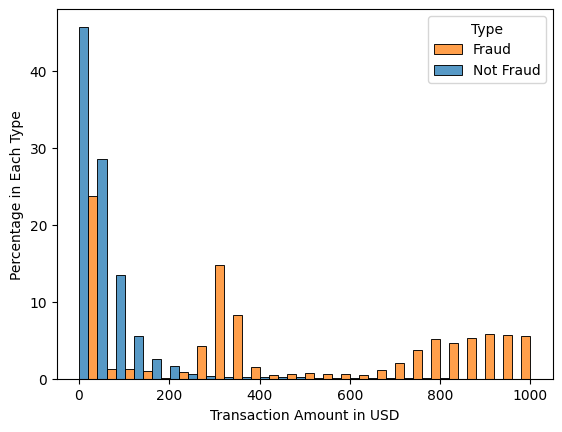

In [50]:
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

 Very important observation this shows that we need to be careful when the transaction amout is very high  
 Thus we need to be more careful if the amount exceeds 200 $

## Fraud,Non-Fraud vs Time(Hours)

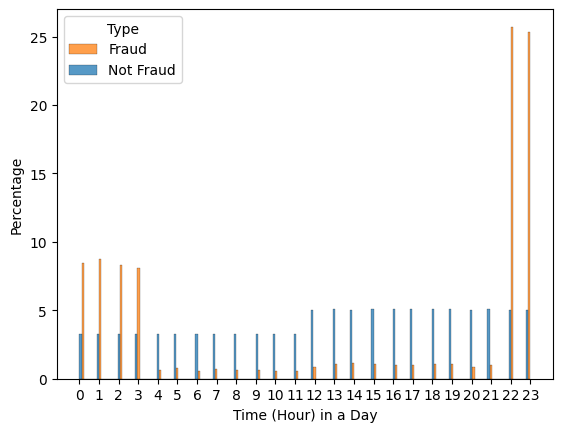

In [51]:
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

This shows that major frauds happens at night.  
It is kind of obvious also when fraudster tries to take control of person account when he is sleeping

# Fraud,Non-Fraud vs Days

C:\Users\surafel\AppData\Local\Temp\ipykernel_2240\2660582218.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


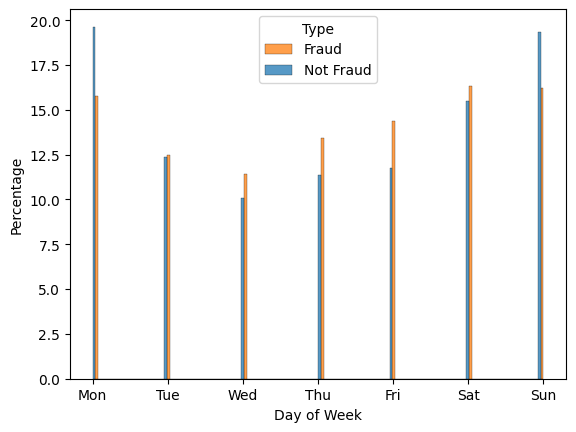

In [52]:
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

C:\Users\surafel\AppData\Local\Temp\ipykernel_2240\112423565.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['', "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


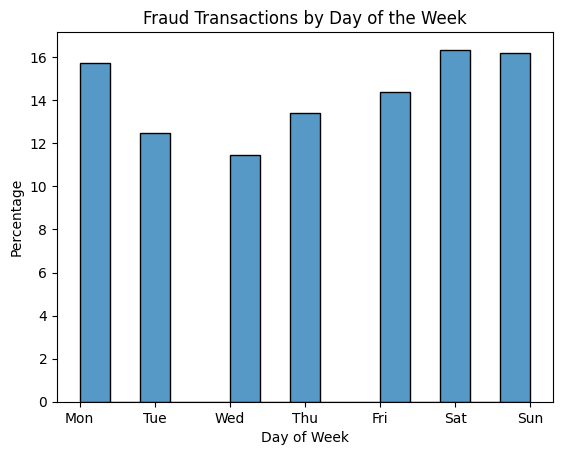

In [53]:
df_fraud = df[df['is_fraud'] == 1]  # Keep only fraud transactions

ax = sns.histplot(data=df_fraud, x="day", common_norm=False, stat='percent', multiple='dodge')

ax.set_xticklabels(['', "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.title('Fraud Transactions by Day of the Week')
plt.show()


This concludes major fraud case happens on weekends as well as on monday

# Fraud,Non-Fraud vs Months

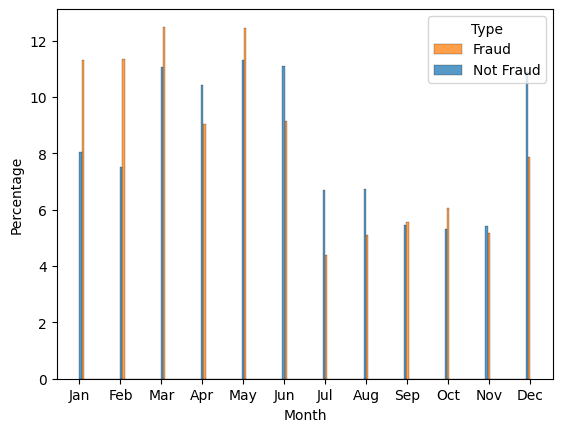

In [54]:
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

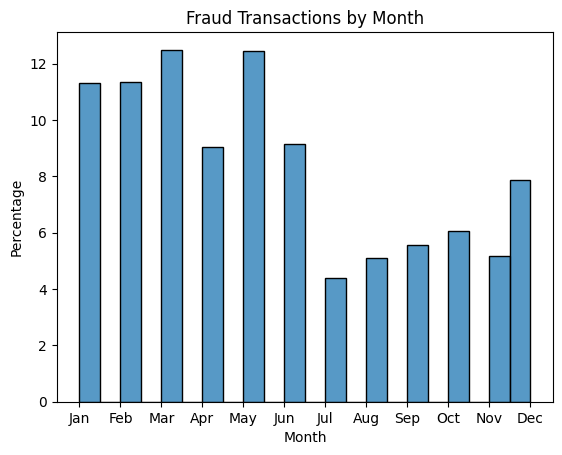

In [55]:
df_fraud = df[df['is_fraud'] == 1]  # Keep only fraud transactions

ax = sns.histplot(data=df_fraud, x="month", common_norm=False, stat='percent', multiple='dodge')

ax.set_ylabel('Percentage')
ax.set_xlabel('Month')

plt.xticks(np.arange(1, 13, 1), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.title('Fraud Transactions by Month')
plt.show()


This shows that major frauds happens in the monthof April, Jun, Jan, Feb.

,trans_date_trans_time,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,category_grocery_pos,category_misc_net,category_others,category_shopping_net,category_shopping_pos,hour,day,month
0,2019-01-01 00:00:18,4.97,0,36.0788,-81.1781,3495,36.011293,-82.048315,0,0.0,1.0,0.0,0.0,0.0,0,1,1
1,2019-01-01 00:00:44,107.23,0,48.8878,-118.2105,149,49.159047,-118.186462,0,1.0,0.0,0.0,0.0,0.0,0,1,1
2,2019-01-01 00:00:51,220.11,1,42.1808,-112.2620,4154,43.150704,-112.154481,0,0.0,0.0,1.0,0.0,0.0,0,1,1
3,2019-01-01 00:01:16,45.00,1,46.2306,-112.1138,1939,47.034331,-112.561071,0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,2019-01-01 00:03:06,41.96,1,38.4207,-79.4629,99,38.674999,-78.632459,0,0.0,0.0,1.0,0.0,0.0,0,1,1


In [57]:
# Extract features and target
X = df.drop(['is_fraud', 'trans_date_trans_time'], axis=1)
y = df['is_fraud']

# Split the data
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)


In [58]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [59]:

# Define a function to evaluate and visualize model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Print metrics
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    # Print confusion matrix and classification report
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Return the trained model and metrics
    return model, {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred_proba': y_pred_proba
    }


In [60]:
# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

# Create base models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    trained_model, metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    results[name] = {
        'model': trained_model,
        'metrics': metrics
    }

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    metrics = result['metrics']
    fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {metrics['roc_auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

# Plot Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    metrics = result['metrics']
    precision, recall, _ = precision_recall_curve(y_test, metrics['y_pred_proba'])
    plt.plot(recall, precision, label=f"{name} (F1 = {metrics['f1']:.4f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'learning_rate': [0.01, 0.05, 0.1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1]
    }
}

# Perform hyperparameter tuning for each model
tuned_models = {}
for name, model in models.items():
    print(f"\nTuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    tuned_models[name] = grid_search.best_estimator_

# Evaluate tuned models
tuned_results = {}
for name, model in tuned_models.items():
    print(f"\nEvaluating tuned {name}...")
    trained_model, metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, f"Tuned {name}")
    tuned_results[name] = {
        'model': trained_model,
        'metrics': metrics
    }

# Plot ROC curves for tuned models
plt.figure(figsize=(10, 8))
for name, result in tuned_results.items():
    metrics = result['metrics']
    fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"Tuned {name} (AUC = {metrics['roc_auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Tuned Models')
plt.legend()
plt.show()

# Plot Precision-Recall curves for tuned models
plt.figure(figsize=(10, 8))
for name, result in tuned_results.items():
    metrics = result['metrics']
    precision, recall, _ = precision_recall_curve(y_test, metrics['y_pred_proba'])
    plt.plot(recall, precision, label=f"Tuned {name} (F1 = {metrics['f1']:.4f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Tuned Models')
plt.legend()
plt.show()

# Find the best model based on F1 score
best_model_name = max(tuned_results, key=lambda x: tuned_results[x]['metrics']['f1'])
best_model = tuned_results[best_model_name]['model']
print(f"\nBest model: {best_model_name} with F1 score: {tuned_results[best_model_name]['metrics']['f1']:.4f}")

# Feature importance for the best model
if best_model_name in ['Random Forest', 'LightGBM', 'XGBoost']:
    # Get feature importances
    if best_model_name == 'Random Forest':
        importances = best_model.feature_importances_
    elif best_model_name == 'LightGBM':
        importances = best_model.feature_importances_
    else:  # XGBoost
        importances = best_model.feature_importances_
    
    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
    plt.title(f'Top 15 Feature Importances for {best_model_name}')
    plt.tight_layout()
    plt.show()

In [ ]:
# Explainable AI with SHAP
import shap

# Create a SHAP explainer for the best model
if best_model_name in ['Random Forest', 'LightGBM', 'XGBoost']:
    print("\nGenerating SHAP values for model explanation...")
    
    # Sample a subset of the test data for SHAP analysis (for computational efficiency)
    X_test_sample = X_test_scaled[:500]
    
    # Create explainer
    if best_model_name == 'Random Forest':
        explainer = shap.TreeExplainer(best_model)
    elif best_model_name == 'LightGBM':
        explainer = shap.TreeExplainer(best_model)
    else:  # XGBoost
        explainer = shap.TreeExplainer(best_model)
    
    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test_sample)
    
    # Summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test_sample, feature_names=X.columns, show=False)
    plt.title(f'SHAP Summary Plot for {best_model_name}')
    plt.tight_layout()
    plt.show()
    
    # Dependence plot for the most important feature
    most_important_feature_idx = np.argmax(np.abs(shap_values).mean(axis=0))
    most_important_feature = X.columns[most_important_feature_idx]
    
    plt.figure(figsize=(10, 8))
    shap.dependence_plot(most_important_feature_idx, shap_values, X_test_sample, 
                         feature_names=X.columns, show=False)
    plt.title(f'SHAP Dependence Plot for {most_important_feature}')
    plt.tight_layout()
    plt.show()


In [ ]:
# Save the best model
with open(f'best_model_{best_model_name}.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"\nBest model ({best_model_name}) saved to 'best_model_{best_model_name}.pkl'")
print("Scaler saved to 'scaler.pkl'")